In [13]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

import torchvision

In [14]:
32/8*32/8

16.0

In [105]:
class Attention(nn.Module):
    
    def __init__(self, dim, n_heads):
        super().__init__()
        dim_head = dim//n_heads
        self.Qms, self.Kms, self.Vms = nn.ModuleList(), nn.ModuleList(), nn.ModuleList()
        for i in range(n_heads):
            self.Qms.append(nn.Linear(dim, dim_head))
            self.Kms.append(nn.Linear(dim, dim_head))
            self.Vms.append(nn.Linear(dim, dim_head))
        
        self.Cm = nn.Linear(dim, dim)
        
    def forward(self, x):
        bs, tl, dim = x.shape # batch size, token length, dimension
        
        nxs = []
        for Qm, Km, Vm in zip(self.Qms, self.Kms, self.Vms):
            q = Qm(x)
            k = Km(x)
            v = Vm(x)
            
            dim = q.shape[-1]
            # print(q.shape, k.shape, v.shape)
        
            q = q.reshape(bs, tl, 1, dim)
            k = k.reshape(bs, 1, tl, dim)

            qk = (q*k).sum(dim=-1)
            qk = qk.softmax(dim=-1)

            nx = (qk[..., None]*v).sum(dim=-2)
            nxs.append(nx)
        nxs = torch.cat(nxs, dim=-1)
        nx = self.Cm(nxs)
        print(nx.shape)

In [290]:
class Attention(nn.Module):
    def __init__(self, dim, n_heads):
        super().__init__()
        self.dim = dim
        self.dim_head = dim//n_heads
        self.n_heads = n_heads
        self.QKVms = nn.Linear(dim, dim*3)
        self.Cm = nn.Linear(dim, dim)
        
    def forward(self, x, y, z):
        bs, tl, dim = x.shape # batch size, token length, dimension
        
        qkv = self.QKVms(x)
        qkv = qkv.reshape(bs, tl, 3, self.n_heads, self.dim_head)
        q, k, v = qkv.split(1, dim=2)
        q, k, v = [a.squeeze(dim=2) for a in [q, k, v]]
        q = q[:, :, None]
        k = k[:, None]
        qk = (q*k).sum(dim=-1)
        qk = qk/self.dim_head
        qk = qk.softmax(dim=2)

        nx = (qk[..., None]*v[:, None]).sum(dim=-3)
        nx = nx.reshape(bs, tl, dim)
        nx = self.Cm(nx)
        return nx, qk.mean(dim=-1)

tensor(0.0012)
torch.Size([4, 16, 200]) torch.Size([4, 16, 16])
0.16496993601322174 198.26150512695312


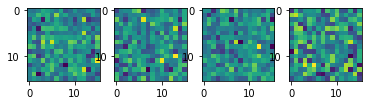

0.0625 0.07469376921653748


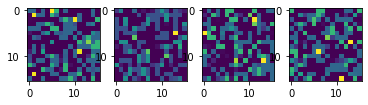



tensor(0.0012)
torch.Size([4, 16, 200]) torch.Size([4, 16, 16])
0.15475402772426605 200.634765625


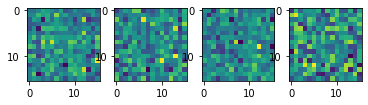

0.0625 0.07607581466436386


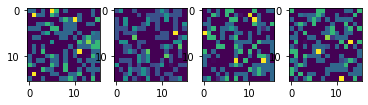

In [302]:
torch.manual_seed(10)
x = torch.randn(4, 16, 200)

att_mine = Attention(200, 10)
att_torch = nn.MultiheadAttention(200, 10, batch_first=True)

for att in [att_mine, att_torch]:
    params = [p.numel() for p in att.parameters()]
    n_params = np.sum(params)
    
    torch.manual_seed(111)
    p = torch.randn(n_params)
    print(p.mean())
    nn.utils.vector_to_parameters(p, att.parameters())
    
    y1, y2 = att(x, x, x)
    print(y1.shape, y2.shape)
    # print(n_params)
    # print(params)
    print(y1.mean().item(), y1.std().item())
    for i, y1i in enumerate(y1):
        plt.subplot(1, 4, i+1)
        plt.imshow(y1[i].detach().numpy()[:, :16])
    plt.show()
    
    print(y2.mean().item(), y2.std().item())
    for i, y2i in enumerate(y2):
        plt.subplot(1, 4, i+1)
        plt.imshow(y2[i].detach().numpy())
    plt.show()
    
    print()
    print()

In [ ]:
class HighAttention(nn.Module):
    
    def __init__(self, dim, n_heads):
        super().__init__()
        dim_head = dim//n_heads
        self.Qms, self.Kms, self.Vms = nn.ModuleList(), nn.ModuleList(), nn.ModuleList()
        for i in range(n_heads):
            self.Qms.append(nn.Linear(dim, dim_head))
            self.Kms.append(nn.Linear(dim, dim_head))
            self.Vms.append(nn.Linear(dim, dim_head))
        
        self.Cm = nn.Linear(dim, dim)
        
    def forward(self, x):
        bs, tl, dim = x.shape # batch size, token length, dimension
        
        nxs = []
        for Qm, Km, Vm in zip(self.Qms, self.Kms, self.Vms):
            q = Qm(x)
            k = Km(x)
            v = Vm(x)
            
            dim = q.shape[-1]
            # print(q.shape, k.shape, v.shape)
        
            q = q.reshape(bs, tl, 1, dim)
            k = k.reshape(bs, 1, tl, dim)

            qk = (q*k).sum(dim=-1)
            qk = qk.softmax(dim=-1)

            nx = (qk[..., None]*v).sum(dim=-2)
            nxs.append(nx)
        nxs = torch.cat(nxs, dim=-1)
        nx = self.Cm(nxs)
        print(nx.shape)